# Sync Test

In [153]:
from training import Training
training = Training(env_name='CartPole-v1', num_envs=10, num_steps=50)
# training = Training(env_name='LaserHockey-v0', num_envs=10, num_steps=50)
training.run()

# Bandit Test

In [28]:
from bandit import Bandit

bandit = Bandit(mode='argmax', l=0, r=1, acc=10, acc2=2, width=2, lr=0.1, d=2)
# bandit.update(x=0.5, g=1)
candidates = bandit.sample()

print("Candidates:", candidates)

Candidates: [0.8 1. ]


In [8]:
from configs import configs

print(configs["CartPole-v1"])

{'replay': 2, 'num_envs': 2, 'batch_size': 64, 'sequence_length': 5, 'bootstrap_length': 5, 'discount': 0.997, 'v_loss_scaling': 1.0, 'q_loss_scaling': 10.0, 'pi_loss_scaling': 10.0, 'importance_sampling_clip_c': 1.05, 'importance_sampling_clip_rho': 1.05, 'optimizer': 'Adam Weight Decay', 'weight_decay_rate': 0.01, 'learning_rate': 0.0005, 'warmup_steps': 4000, 'adamw_beta1': 0.9, 'adamw_beta2': 0.98, 'adamw_epsilon': 1e-06, 'adamw_clip_norm': 50.0, 'learner_push_model_every_n_steps': 25, 'actor_pull_model_every_n_steps': 64, 'architecture_params': {'architecture': 'dense', 'input_dim': 4, 'hidden_dim': 128, 'action_dim': 2}, 'bandit_params': {'mode': ['argmax', 'random'], 'tau1': [0.0, 50.0], 'tau2': [0.0, 50.0], 'epsilon': [0.0, 1.0], 'acc': [50, 50, 10], 'acc2': [2, 3, 4], 'width': [2, 3, 4], 'lr': [0.05, 0.1, 0.2], 'd': 3}}


In [12]:
from configs import configs
# from bandit import initialize_bandits
# from bandit import update_bandits
# from bandit import get_candidates
# from bandit import sample_candidate
# from bandit import get_all_indeces

env_name = "CartPole-v1"
config = configs[env_name]

# bandits = initialize_bandits(params["bandit_params"])

In [100]:
update_bandits(bandits, 22.666666666666664, 9.666666666666666, 0.8500000000000001, 0.5)

In [102]:
bandits[27]['tau1'].sample()

array([22.5, 22. , 21.5])

In [103]:
all_candidates = get_candidates(bandits)
sampled_candidate = sample_candidate(all_candidates)
print(sampled_candidate)

(23.0, 10.0, 0.8500000000000001)


In [106]:
get_all_indeces(5, bandits)

array([[ 3.75      , 45.75      ,  0.33333333],
       [33.66666667, 31.25      ,  0.375     ],
       [ 1.5       , 41.        ,  0.95      ],
       [ 4.75      , 42.5       ,  0.95      ],
       [24.66666667, 14.66666667,  0.        ]])

In [1]:
from bandit import Bandits

In [13]:
bandits = Bandits(configs[env_name])

In [15]:
bandits.bandits

[{'tau1': <bandit.Bandit at 0x218b375dc10>,
  'tau2': <bandit.Bandit at 0x218b309d150>,
  'epsilon': <bandit.Bandit at 0x218b309d550>},
 {'tau1': <bandit.Bandit at 0x218b30a0c90>,
  'tau2': <bandit.Bandit at 0x218b309b6d0>,
  'epsilon': <bandit.Bandit at 0x218b3902490>},
 {'tau1': <bandit.Bandit at 0x218b25caf10>,
  'tau2': <bandit.Bandit at 0x218b38799d0>,
  'epsilon': <bandit.Bandit at 0x218b3878950>},
 {'tau1': <bandit.Bandit at 0x218b3878c90>,
  'tau2': <bandit.Bandit at 0x218b3878e10>,
  'epsilon': <bandit.Bandit at 0x218b3906a90>},
 {'tau1': <bandit.Bandit at 0x218b3906dd0>,
  'tau2': <bandit.Bandit at 0x218b3906d90>,
  'epsilon': <bandit.Bandit at 0x218b3906f90>},
 {'tau1': <bandit.Bandit at 0x218b3907010>,
  'tau2': <bandit.Bandit at 0x218b3906ed0>,
  'epsilon': <bandit.Bandit at 0x218b3906e50>},
 {'tau1': <bandit.Bandit at 0x218b3906f50>,
  'tau2': <bandit.Bandit at 0x218b3905f50>,
  'epsilon': <bandit.Bandit at 0x218b3906f10>},
 {'tau1': <bandit.Bandit at 0x218b3904b90>,
  't

# Actor Test

In [114]:
import torch
from actor import Actor
from configs import configs

env_name = "Acrobot-v1"
config = configs[env_name]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

actor = Actor(config['architecture_params'], device)


In [115]:
obs = [[1,2,3,4,5,6], [2,3,4,5,6,7]]
ind = [[1,1,0.4], [1,1,.6]]

In [138]:
v1, v2, a1, a2, policy = actor.calculate_values(obs, ind)
v1, v2, a1, a2, policy

(tensor([[0.0998],
         [0.1613]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[0.3956],
         [0.4774]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[-0.4400,  0.5586,  0.2163],
         [-0.4932,  0.6671,  0.2509]], device='cuda:0',
        grad_fn=<AddmmBackward0>),
 tensor([[0.3553, 0.1147, 0.0667],
         [0.5267, 0.2046, 0.0848]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[0.3075, 0.3785, 0.3140],
         [0.2643, 0.4265, 0.3092]], device='cuda:0', grad_fn=<AddBackward0>))

In [132]:
action, action_prob = actor.get_action(policy, stochastic=True)
action, action_prob

(tensor([2, 1], device='cuda:0'),
 tensor([[0.3140],
         [0.4265]], device='cuda:0', grad_fn=<GatherBackward0>))

# Show Test

In [20]:
import torch
import gymnasium as gym
from actor import Actor
from configs import configs

# env_name = "Acrobot-v1"
env_name = "LunarLander-v2"
config = configs[env_name]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
env = gym.make(env_name, render_mode="human")
observation, info = env.reset()
# actor = Actor(config['architecture_params'], device)

for _ in range(300):
    # actions = [self.env.single_action_space.sample() for _ in range(self.num_envs)]
    action = env.action_space.sample()
    # dummy_indeces = [[1,1,1]]
    # v1, v2, a1, a2, policy = actor.calculate_values(observation, dummy_indeces)
    # action, action_probs = actor.get_action(policy, stochastic=True)
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

# Tensorboard Test

In [76]:
from configs import configs
from actor import Actor

env_name = "CartPole-v1"
config = configs[env_name]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
actor = Actor(config['architecture_params'], device)
model = actor.actor1

from torch.utils.tensorboard import SummaryWriter
import datetime
import json
import os

# Define hyperparameters
hyperparams = {
    'learning_rate': 2e-3,
    'batch_size': 64,
    'num_epochs': 100
}

# Get current timestamp
timestamp = datetime.datetime.now().strftime("%b%d-%H-%M-%S")

# Create a more descriptive name for the run
run_name = f"lr{hyperparams['learning_rate']},bs{hyperparams['batch_size']},s{hyperparams['num_epochs']}_{timestamp}"

# Create a SummaryWriter with a custom log directory and run name
log_dir = f"runs/{run_name}"
writer = SummaryWriter(log_dir=log_dir)

# Save hyperparameters as a separate file
hyperparams_file = os.path.join(log_dir, 'hyperparameters.json')
with open(hyperparams_file, 'w') as f:
    json.dump(hyperparams, f)

# Log images, histograms, and dummy metrics in a loop
for i in range(20):
    actor = Actor(config['architecture_params'], device)

    # Update dummy metrics
    metrics = {
        'accuracy/agent1': 0.45 + i * 0.01,
        'accuracy/agent2': 0.35 + i * 0.02,
        'loss/train': 0.30 - i * 0.01,
        'loss/val': 0.40 - i * 0.02
    }

    # Log histograms
    for name, param in actor.actor1.named_parameters():
        writer.add_histogram(name, param, global_step=i)

    # Log dummy metrics
    for metric_name, metric_value in metrics.items():
        writer.add_scalar(metric_name, metric_value, global_step=i)

# Close the SummaryWriter
writer.flush()
writer.close()

# Reward Shaping Test

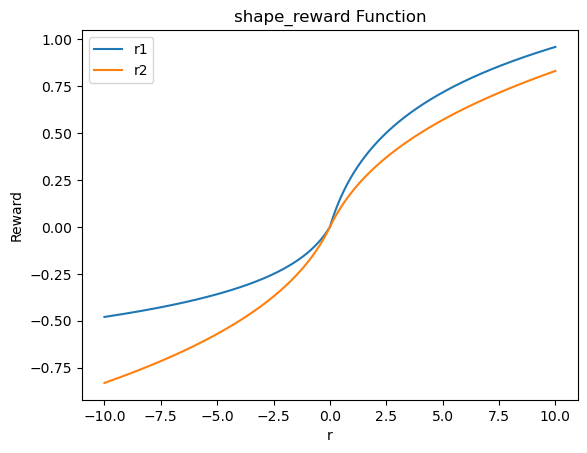

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def shape_reward(r):
    r_log = np.log(np.abs(r) + 1.) / 5
    r1 = np.where(np.sign(r) > 0, r_log * 2, r_log * -1)
    r2 = (np.sign(r) * ((np.abs(r) + 1.)**(1/4) - 1.) + 0.001 * r) / 1
    return r1, r2

x = np.linspace(-10, 10, 1000)  # Generate 1000 x-values from -50 to 50
r1, r2 = shape_reward(x)  # Evaluate the shape_reward function for each x-value

plt.plot(x, r1, label='r1')
plt.plot(x, r2, label='r2')
plt.xlabel('r')
plt.ylabel('Reward')
plt.title('shape_reward Function')
plt.legend()
plt.show()

# Interaction Test

In [1]:
import torch
from configs import configs
from actor import Actor
from learner import Learner
from bandit import Bandits
from training import Training
from data_collector import DataCollector
from metric import Metric

env_name = "CartPole-v1"
# env_name = "LunarLander-v2"
# env_name = "LaserHockey-v0"

test_parameters = {'num_envs': 32,
                   'batch_size': 32,
                   'sequence_length': 10,
                   'bootstrap_length': 3,
                   'learning_rate': 1e-4,
                   'd_push': 1,
                   'd_pull': 10}

config = {key: test_parameters[key] if key in test_parameters else value for key, value in configs[env_name].items()}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_collector = DataCollector(config)
metric = Metric(config, env_name, test_parameters)
bandits = Bandits(config)
actor = Actor(config, metric, device)
learner = Learner(config, metric, device)
training = Training(config, env_name)

training.run(actor, learner, bandits, data_collector, metric)

RuntimeError: File runs/CartPole-v1/env32,bs32,ss10,bb3,lr0.0001,d_o1,d_i10_Oct17-02-47-01/models/learner1.pth cannot be opened.

# Testing Random Stuff

In [13]:
import torch

a = torch.tensor([1.,1,1])

torch.log(torch.tensor([1.,0.000001,1]))

tensor([  0.0000, -13.8155,   0.0000])